In [34]:
import numpy as np

from PIL import Image, ImageFilter
from matplotlib import pylab as pylab
from matplotlib import pyplot as plt

# %matplotlib inline
pylab.rcParams['figure.figsize'] = (8, 8)

from pathlib import Path

image = 'coral'
size  = 1800

experiment = 'roundoff'

output = Path('outputs') / f'{image}-{size}'

output.mkdir(exist_ok=True, parents=True)

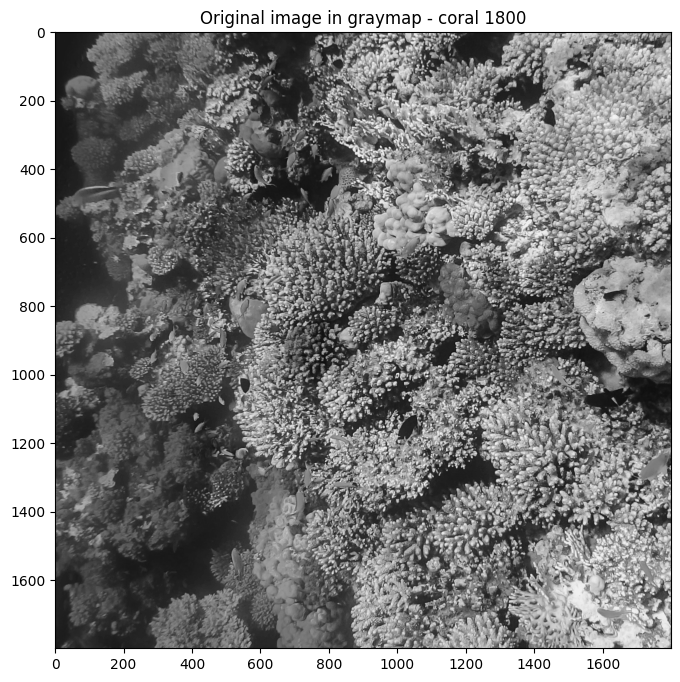

In [35]:
y, cb, cr = Image.open(f'../../images/{image}/{image}-{size}.png').convert('YCbCr').split()

im = np.array(y)
im = im[:im.shape[0] - im.shape[0]%8, :im.shape[1] - im.shape[1]%8]

im = im.astype(np.int64)

plt.figure()
plt.imshow(im, cmap='gray')
plt.title(f"Original image in graymap - {image} {size}")

plt.imsave(f'{output}/original.png', im, cmap='gray')

In [36]:
unique, counts = np.unique(im % 10, return_counts=True)

print(np.asarray((unique, counts)).T)

[[     0 326079]
 [     1 326767]
 [     2 322986]
 [     3 324002]
 [     4 322730]
 [     5 320382]
 [     6 325622]
 [     7 325968]
 [     8 325548]
 [     9 319916]]


In [37]:
# pixels that benefit from Lower
counts[3:8].sum()

1618704

In [38]:
# pixels that benefit from Nearest
counts[0:3].sum() + counts[8:].sum()

1621296